# Pattern Problem
## Non Linear Model

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification, make_circles
%matplotlib inline
%config InlineBackend.figure_model='retina'

### Concentric Circles

In [3]:
np.random.seed(1)
def CircleXY(r, n, sigma):
    theta = np.random.uniform(low=0,high=2*np.pi, size=n)
    x_error = np.random.normal(loc=.0, scale=sigma, size=n)
    y_error = np.random.normal(loc=.0, scale=sigma, size=n)
    
    x_val = r*np.cos(theta)+x_error
    y_val = r*np.sin(theta)+y_error
    return x_val, y_val, np.repeat(r, n) #r을 n번 반복

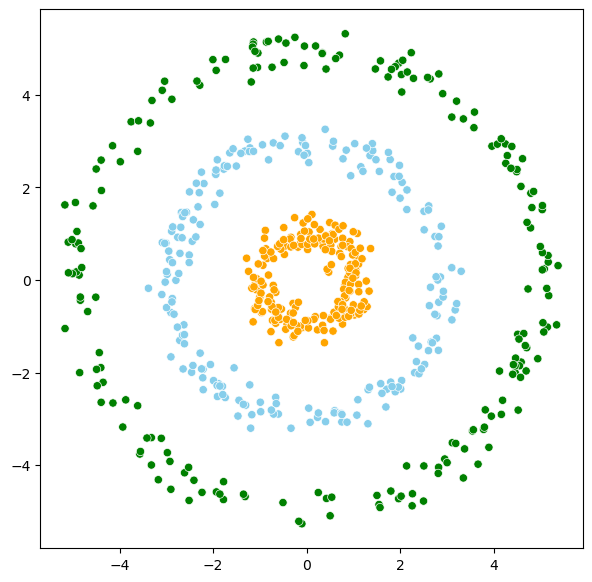

In [4]:
plt.figure(figsize=(7,7))
n = 200
r_list = [1, 3, 5]
sigma = 0.2
parm_lists = [(r, n , sigma) for r in r_list]
coordinates = [CircleXY(param[0], param[1], param[2]) for param in parm_lists]
color_code = {1:'orange', 3:'skyblue', 5:'green'}
for j in range(0, len(coordinates)):
    x,y,group = coordinates[j]
    sns.scatterplot(x=x, y=y, c=[color_code.get(i) for i in group])
plt.show()

In [5]:
coordinates[0][2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
"""
X1 = np.append(np.append(coordinates[0][0], coordinates[1][0]), coordinates[2][0])
X2 = np.append(np.append(coordinates[0][1], coordinates[1][1]), coordinates[2][1])
y_2_bf = np.append(np.append(coordinates[0][2], coordinates[1][2]), coordinates[2][2])
"""

'\nX1 = np.append(np.append(coordinates[0][0], coordinates[1][0]), coordinates[2][0])\nX2 = np.append(np.append(coordinates[0][1], coordinates[1][1]), coordinates[2][1])\ny_2_bf = np.append(np.append(coordinates[0][2], coordinates[1][2]), coordinates[2][2])\n'

In [7]:
X1, X2, y_2_bf = [np.append(np.append(coordinates[0][i], coordinates[1][i]), coordinates[2][i]) for i in range(3)]
X_2 = np.c_[X1,X2]
mapping_dic = {1:0, 3:1, 5:2}
y_2_bf2 = [mapping_dic.get(i) for i in y_2_bf]
print(type(y_2_bf2))
y_2 = np.array(y_2_bf2)
print(type(y_2))

<class 'list'>
<class 'numpy.ndarray'>


### Interleaving Half Circles

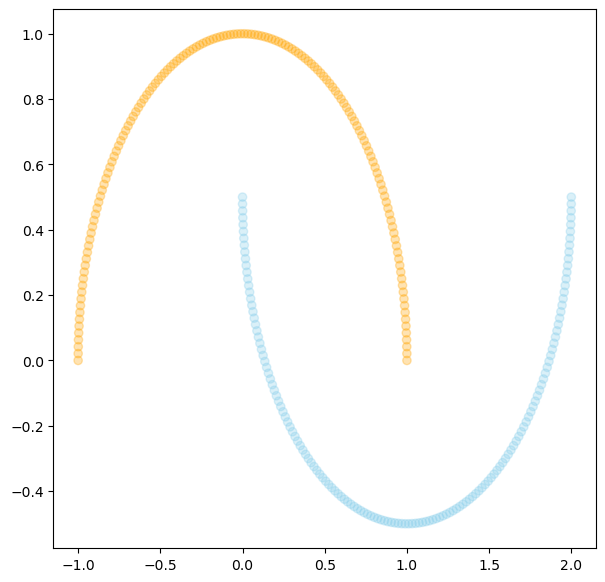

In [8]:
X_3, y_3 = make_moons(n_samples=300, random_state=1)
plt.figure(figsize=(7,7))
color_code={0:'orange', 1:'skyblue'}

plt.scatter(X_3[:,0], X_3[:,1], c=[color_code.get(i) for i in y_3], alpha=0.3)
plt.show()

In [9]:
from sklearn.cluster import KMeans

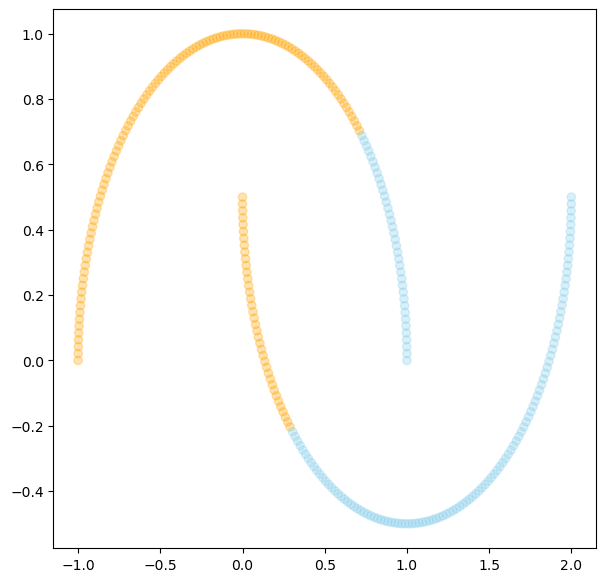

In [10]:
km1 = KMeans(n_clusters=2, n_init=10, random_state=1)
km1.fit(X_3)
y_km = km1.labels_

plt.figure(figsize=(7,7))
plt.scatter(X_3[:,0], X_3[:,1], color=[color_code.get(i) for i in y_km], alpha=0.3)
plt.show()

In [11]:
from sklearn.decomposition import PCA

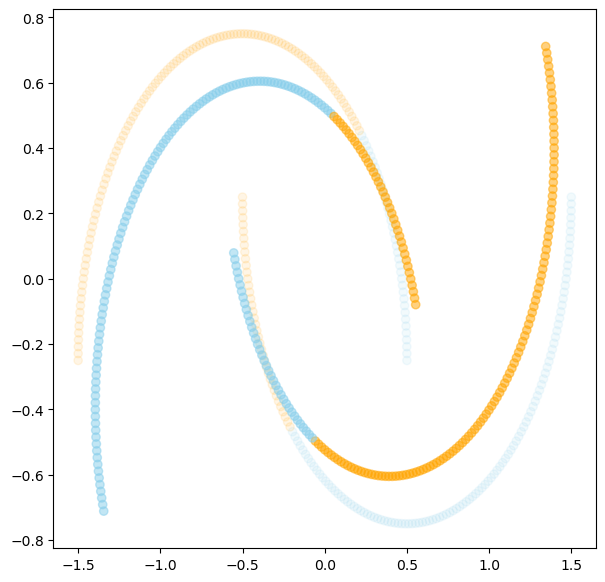

In [12]:
mX_3 = X_3.copy()
for i in range(mX_3.shape[1]):
    mX_3[:,i] = mX_3[:,i] - np.mean(mX_3[:,i])

pca = PCA()
pca.fit(mX_3)
PCscore = pca.transform(mX_3)
km_PCA = KMeans(n_clusters=2, n_init=10, random_state=1)
km_PCA.fit(PCscore)
y_PCA_km = km_PCA.labels_

plt.figure(figsize=(7,7))
plt.scatter(mX_3[:,0], mX_3[:,1], color=[color_code.get(i) for i in y_km], alpha=0.1)
plt.scatter(PCscore[:,0], PCscore[:,1], color=[color_code.get(i) for i in y_PCA_km], alpha=0.5)
plt.show()

### Spiral Model

In [13]:
from synthetic_dataset.soydata.data import *

In [14]:
X_4, y_4 = classification.make_spiral(n_samples_per_class=500,
                                      n_classes=2,
                                      n_rotations=2,
                                      gap_between_spiral=30,
                                      noise=.05
                                     )

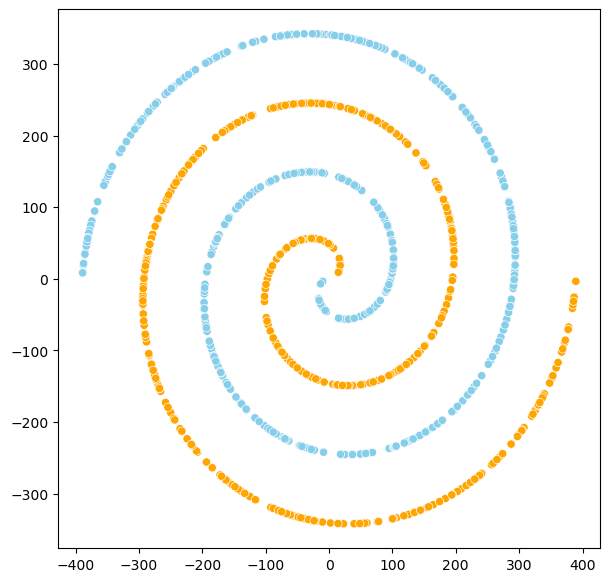

In [15]:
plt.figure(figsize=(7,7))

sns.scatterplot(x=X_4[:,0], y=X_4[:,1], c=[color_code.get(i) for i in y_4])
plt.show()